# Transfer and selection Policy

This script looks at transfer policies. For the first part of the season, we will just focus on fixtures (expected goals and clean sheets) until the dust settles and we can see which players are performing well this season and calculate fresh ROI's. I feel that anything under 6 gameweeks will not have asymptoted anywhere near enough towards its true value.

<b>There are two plots for expected goals and clean sheets and the player stats are at the bottom in descending order in terms of ROI.<b>

### Expected goals

Text(0.5, 1.0, 'Expected Goals')

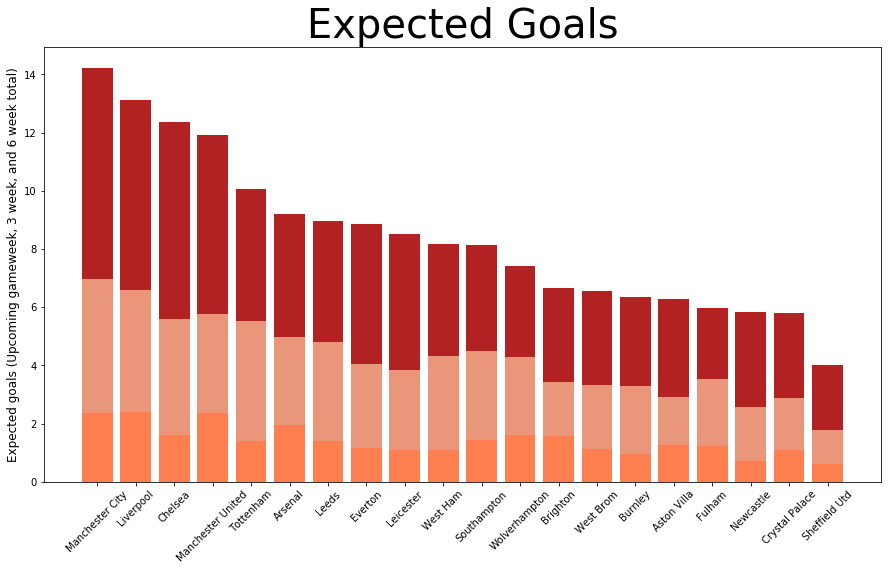

In [3]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://playerdatabase247.com/include_premier_league_fixture_tracker_uusi.php?listtype=expgoals"
r = requests.get(url)
#print(r.status_code)

soup = BeautifulSoup(r.text, 'html.parser')
table = soup.find('table')
cells = table.find_all("td")

def scrape(cells):
    lizt = []
    for cell in cells:
        text = cell.text.strip()
        lizt.append(text)
    return(lizt)
    
output = scrape(cells)

output = np.array(output)
output = output.reshape(21,8)
output = pd.DataFrame(output)
header_row = 0
output.columns = output.iloc[header_row]
output = output.drop(header_row)
output = output.reset_index(drop = True)
output.columns = ["team", "gw1", "gw2", "gw3", "gw4", "gw5", "gw6", "total"]

def remove_char(string):
    import re
    string = re.sub("[A-Za-z]", "", string);
    return string

output.gw1 = output.gw1.apply(remove_char)
output.gw1 = output.gw1.apply(float)
output.gw2 = output.gw2.apply(remove_char)
output.gw2 = output.gw2.apply(float)
output.gw3 = output.gw3.apply(remove_char)
output.gw3 = output.gw3.apply(float)
output.gw4 = output.gw4.apply(remove_char)
output.gw4 = output.gw4.apply(float)
output.gw5 = output.gw5.apply(remove_char)
output.gw5 = output.gw5.apply(float)
output.gw6 = output.gw6.apply(remove_char)
output.gw6 = output.gw6.apply(float)
EG = output


fig, ax = plt.subplots(figsize = (15,8))
output.total = output.total.apply(float)
ax.bar(output.team, output.total, color = "firebrick")
ax.bar(output.team, output.gw1+output.gw2+output.gw3, color = "darksalmon")
ax.bar(output.team, output.gw1, color = "coral")
ax.set_ylabel("Expected goals (Upcoming gameweek, 3 week, and 6 week total)", size = 12)
plt.xticks(rotation = 45)
plt.title("Expected Goals", size = 40)


Text(0.5, 1.0, 'Expected Clean Sheets')

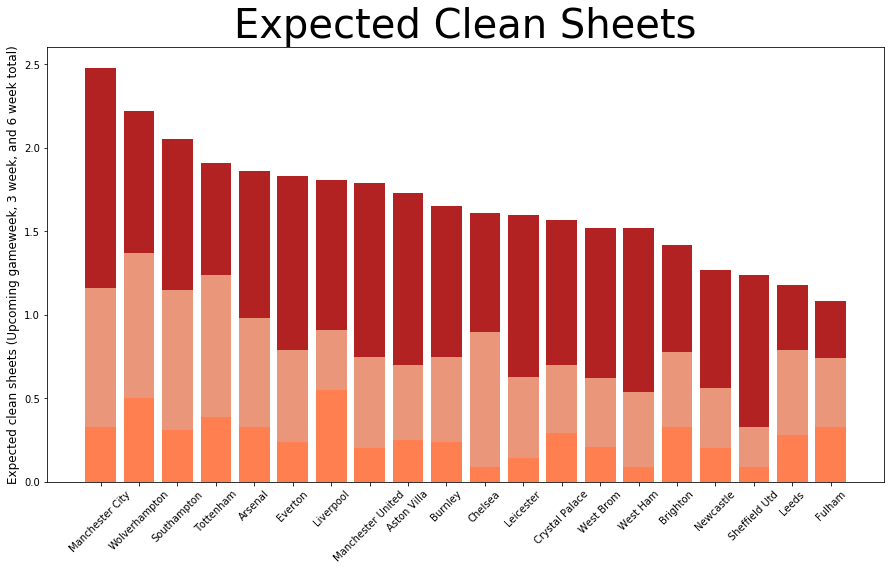

In [2]:
url = "https://playerdatabase247.com/include_premier_league_fixture_tracker_uusi.php?listtype=cs"

r = requests.get(url)
#print(r.status_code)

soup = BeautifulSoup(r.text, 'html.parser')
table = soup.find('table')
cells = table.find_all("td")

output = scrape(cells)

output = np.array(output)
output = output.reshape(21,8)
output = pd.DataFrame(output)
header_row = 0
output.columns = output.iloc[header_row]
output = output.drop(header_row)
output = output.reset_index(drop = True)
output.columns = ["team", "gw1", "gw2", "gw3", "gw4", "gw5", "gw6", "total"]

output.gw1 = output.gw1.apply(remove_char)
output.gw1 = output.gw1.apply(float)
output.gw2 = output.gw2.apply(remove_char)
output.gw2 = output.gw2.apply(float)
output.gw3 = output.gw3.apply(remove_char)
output.gw3 = output.gw3.apply(float)
output.gw4 = output.gw4.apply(remove_char)
output.gw4 = output.gw4.apply(float)
output.gw5 = output.gw5.apply(remove_char)
output.gw5 = output.gw5.apply(float)
output.gw6 = output.gw6.apply(remove_char)
output.gw6 = output.gw6.apply(float)
ECS = output


fig, ax = plt.subplots(figsize = (15,8))
output.total = output.total.apply(float)
ax.bar(output.team, output.total, color = "firebrick")
ax.bar(output.team, output.gw1+output.gw2+output.gw3, color = "darksalmon")
ax.bar(output.team, output.gw1, color = "coral")
ax.set_ylabel("Expected clean sheets (Upcoming gameweek, 3 week, and 6 week total)", size = 12)
plt.xticks(rotation = 45)
plt.title("Expected Clean Sheets", size = 40)


### Players

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2020-21/players_raw.csv")
df["position"] = df["element_type"]
df.position = df.position.replace([1,2,3,4], ["GK", "DEF", "MID", "FWD"])
df.now_cost = df.now_cost/10


"""roi"""
roi = df.loc[:, ["web_name", "position", "total_points", "now_cost", "team"]]
roi["roi"] = roi["total_points"]/roi["now_cost"]
roi = roi.sort_values(by = "roi", ascending = False)

roi.team = roi.team.replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                ["Arsenal", "Aston Villa", "Brighton", "Burnley", "Chelsea", 
                "Crystal Palace", "Everton", "Fulham", "Leicester", "Leeds",
                "Liverpool", "Manchester City", "Manchester United",
                "Newcastle", "Sheffield Utd", "Southampton", "Tottenham",
                "West Brom", "West Ham", "Wolverhampton"])

roi_GK = roi[roi.position == "GK"]
roi_GK = roi_GK.iloc[0:10, :]

roi_DEF = roi[roi.position == "DEF"]
roi_DEF = roi_DEF.iloc[0:10, :]

roi_MID = roi[roi.position == "MID"]
roi_MID = roi_MID.iloc[0:10, :]

roi_FWD = roi[roi.position == "FWD"]
roi_FWD = roi_FWD.iloc[0:10, :]

In [5]:
EG["EG - one week"] = EG.gw1
EG["EG - three week"] = EG.gw1 + EG.gw2 + EG.gw3
EG["EG - six week"] = EG.total
EG = EG.iloc[:,[0,8,9,10]]

ECS["ECS - one week"] = ECS.gw1
ECS["ECS - three week"] = ECS.gw1 + ECS.gw2 + ECS.gw3
ECS["ECS - six week"] = ECS.total
ECS = ECS.iloc[:,[0,8,9,10]]


In [6]:
full_df = pd.merge(roi,EG, on = "team")
full_df = pd.merge(full_df, ECS, on = "team")

In [7]:
full_df = full_df.sort_values(by = "roi", ascending = False)
full_df.columns

Index(['web_name', 'position', 'total_points', 'now_cost', 'team', 'roi',
       'EG - one week', 'EG - three week', 'EG - six week', 'ECS - one week',
       'ECS - three week', 'ECS - six week'],
      dtype='object')

In [8]:

float_cols = ['total_points', 'now_cost','roi',
       'EG - one week', 'EG - three week', 'EG - six week', 'ECS - one week',
       'ECS - three week', 'ECS - six week', 'ECS - one week',
       'ECS - three week', 'ECS - six week']

full_df

for i in float_cols:
    full_df[i] = pd.to_numeric(full_df[i])
    


In [9]:
GK = full_df[full_df.position == "GK"]
GK = GK.iloc[0:20,:]

DEF = full_df[full_df.position == "DEF"]
DEF = DEF.iloc[0:15,:]

MID = full_df[full_df.position == "MID"]
MID = MID.iloc[0:15,:]

FWD = full_df[full_df.position == "FWD"]
FWD = FWD.iloc[0:15,:]

#allows colouring of cells
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]


### Forwards

In [10]:
FWD = FWD.style.apply(highlight_max, subset=[
       'EG - one week', 'EG - three week', 'EG - six week'])

In [11]:
FWD

,web_name,position,total_points,now_cost,team,roi,EG - one week,EG - three week,EG - six week,ECS - one week,ECS - three week,ECS - six week
32,Kane,FWD,60,10.7,Tottenham,5.60748,1.41,5.54,10.07,0.39,1.24,1.91
145,Calvert-Lewin,FWD,43,7.7,Everton,5.58442,1.16,4.06,8.85,0.24,0.79,1.83
173,Wilson,FWD,36,6.5,Newcastle,5.53846,0.7,2.58,5.82,0.2,0.56,1.27
204,Bamford,FWD,32,5.8,Leeds,5.51724,1.39,4.81,8.97,0.28,0.79,1.18
233,Maupay,FWD,34,6.6,Brighton,5.15152,1.56,3.44,6.66,0.33,0.78,1.42
5,Watkins,FWD,25,6,Aston Villa,4.16667,1.27,2.91,6.29,0.25,0.7,1.73
327,Ings,FWD,31,8.5,Southampton,3.64706,1.42,4.5,8.12,0.31,1.15,2.05
328,Adams,FWD,21,5.8,Southampton,3.62069,1.42,4.5,8.12,0.31,1.15,2.05
267,Vardy,FWD,34,10.1,Leicester,3.36634,1.11,3.84,8.53,0.14,0.63,1.6
412,Callum Robinson,FWD,18,5.5,West Brom,3.27273,1.12,3.32,6.54,0.21,0.62,1.52


### Midfielders

In [12]:
MID = MID.style.apply(highlight_max, subset=['EG - one week','EG - three week', 'EG - six week', 
                                             'ECS - one week','ECS - three week', 'ECS - six week'])

MID

,web_name,position,total_points,now_cost,team,roi,EG - one week,EG - three week,EG - six week,ECS - one week,ECS - three week,ECS - six week
31,Son,MID,58,9.3,Tottenham,6.23656,1.41,5.54,10.07,0.39,1.24,1.91
62,Jorginho,MID,32,5.2,Chelsea,6.15385,1.61,5.59,12.37,0.09,0.9,1.61
3,Grealish,MID,38,7.2,Aston Villa,5.27778,1.27,2.91,6.29,0.25,0.7,1.73
4,McGinn,MID,27,5.5,Aston Villa,4.90909,1.27,2.91,6.29,0.25,0.7,1.73
146,Rodríguez,MID,39,8,Everton,4.875,1.16,4.06,8.85,0.24,0.79,1.83
293,Zaha,MID,35,7.2,Crystal Palace,4.86111,1.11,2.88,5.79,0.29,0.7,1.57
118,Bowen,MID,29,6.3,West Ham,4.60317,1.1,4.33,8.16,0.09,0.54,1.52
205,Costa,MID,26,5.7,Leeds,4.5614,1.39,4.81,8.97,0.28,0.79,1.18
206,Klich,MID,25,5.6,Leeds,4.46429,1.39,4.81,8.97,0.28,0.79,1.18
175,Hendrick,MID,22,5,Newcastle,4.4,0.7,2.58,5.82,0.2,0.56,1.27


### Defenders

In [13]:
DEF = DEF.style.apply(highlight_max, subset=['ECS - one week','ECS - three week', 'ECS - six week'])

DEF

,web_name,position,total_points,now_cost,team,roi,EG - one week,EG - three week,EG - six week,ECS - one week,ECS - three week,ECS - six week
1,Konsa,DEF,28,4.6,Aston Villa,6.08696,1.27,2.91,6.29,0.25,0.7,1.73
87,Saïss,DEF,31,5.2,Wolverhampton,5.96154,1.61,4.29,7.4,0.5,1.37,2.22
2,Mings,DEF,30,5.1,Aston Villa,5.88235,1.27,2.91,6.29,0.25,0.7,1.73
117,Cresswell,DEF,29,5,West Ham,5.8,1.1,4.33,8.16,0.09,0.54,1.52
88,Kilman,DEF,21,4,Wolverhampton,5.25,1.61,4.29,7.4,0.5,1.37,2.22
264,Castagne,DEF,29,5.8,Leicester,5,1.11,3.84,8.53,0.14,0.63,1.6
147,Keane,DEF,24,5.1,Everton,4.70588,1.16,4.06,8.85,0.24,0.79,1.83
324,Vestergaard,DEF,21,4.5,Southampton,4.66667,1.42,4.5,8.12,0.31,1.15,2.05
63,Zouma,DEF,23,5,Chelsea,4.6,1.61,5.59,12.37,0.09,0.9,1.61
148,Digne,DEF,27,6.2,Everton,4.35484,1.16,4.06,8.85,0.24,0.79,1.83


### Goalkeepers

In [14]:
GK = GK.style.apply(highlight_max, subset=['ECS - one week','ECS - three week', 'ECS - six week'])

In [15]:
GK

,web_name,position,total_points,now_cost,team,roi,EG - one week,EG - three week,EG - six week,ECS - one week,ECS - three week,ECS - six week
0,Martínez,GK,31,4.8,Aston Villa,6.45833,1.27,2.91,6.29,0.25,0.7,1.73
174,Darlow,GK,27,5,Newcastle,5.4,0.7,2.58,5.82,0.2,0.56,1.27
89,Patrício,GK,22,5.5,Wolverhampton,4,1.61,4.29,7.4,0.5,1.37,2.22
325,McCarthy,GK,18,4.5,Southampton,4,1.42,4.5,8.12,0.31,1.15,2.05
410,Johnstone,GK,17,4.5,West Brom,3.77778,1.12,3.32,6.54,0.21,0.62,1.52
207,Meslier,GK,17,4.5,Leeds,3.77778,1.39,4.81,8.97,0.28,0.79,1.18
352,Leno,GK,17,5,Arsenal,3.4,1.94,4.96,9.19,0.33,0.98,1.86
122,Fabianski,GK,17,5,West Ham,3.4,1.1,4.33,8.16,0.09,0.54,1.52
296,Guaita,GK,16,5,Crystal Palace,3.2,1.11,2.88,5.79,0.29,0.7,1.57
151,Pickford,GK,15,5,Everton,3,1.16,4.06,8.85,0.24,0.79,1.83
